In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from decimal import Decimal
from babel.numbers import format_currency
#from itables import init_notebook_mode
#init_notebook_mode(all_interactive=True)

In [2]:
census_data_csv = ("Census_Final.csv")


In [3]:
census_data_df = pd.read_csv(census_data_csv, index_col=False)


In [4]:
census_data_df.head()


,City,Total Migration
0,Atlanta,"25,049"
1,Austin,"42,541"
2,Sacramento,"8,325"


In [5]:
#Cleaning the data to match the desired outcomes
census_data_rename_df = census_data_df.rename(columns = {"City":"Metropolitan","Total Migration":"Total Migration of 2021"})

In [6]:
census_data_rename_df.head()

,Metropolitan,Total Migration of 2021
0,Atlanta,"25,049"
1,Austin,"42,541"
2,Sacramento,"8,325"


In [7]:
#Connecting the files
rent_data_csv = ("Raw_Data_VL\Clean_rent.csv")

In [8]:
rent_data_df = pd.read_csv(rent_data_csv)

In [9]:
rent_data_df.head()

,Unnamed: 0,Metropolitan,State,Avg Rent 2019,Avg Rent 2020,Avg Rent 2021,Avg Rent 2022
0,10,Austin,TX,1453.997604,1454.412674,1636.725076,1858.342581
1,30,Sacramento,CA,1636.942532,1721.861460,1901.530077,2055.795276


In [10]:
#Merging the Dataframes together
merge_data_df = pd.merge(rent_data_df, census_data_rename_df, how="left", on=["Metropolitan"])

In [11]:
merge_data_df.head()

,Unnamed: 0,Metropolitan,State,Avg Rent 2019,Avg Rent 2020,Avg Rent 2021,Avg Rent 2022,Total Migration of 2021
0,10,Austin,TX,1453.997604,1454.412674,1636.725076,1858.342581,"42,541"
1,30,Sacramento,CA,1636.942532,1721.861460,1901.530077,2055.795276,"8,325"


In [12]:
#Isolating the needed Data
merge_clean_df = merge_data_df.iloc[:, [1,5]]

In [13]:
merge_clean_df.head()


,Metropolitan,Avg Rent 2021
0,Austin,1636.725076
1,Sacramento,1901.530077


In [14]:
#This was an attempt to foce the data in descending order
#merge_clean_df = merge_clean_df.reindex(index = ["Austin", "Sacramento"])
#merge_clean_df

In [15]:
merge_clean_df.head()

,Metropolitan,Avg Rent 2021
0,Austin,1636.725076
1,Sacramento,1901.530077


In [16]:
#Creating a new dataframe and setting the dataframe Index using only existing columns
new_df = merge_clean_df.set_index('Metropolitan').T
new_df.head()

Metropolitan,Austin,Sacramento
Avg Rent 2021,1636.725076,1901.530077


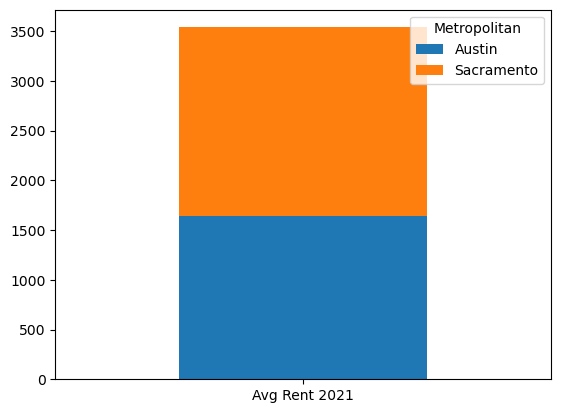

In [17]:
#Creating A stacked vertical chart 
new_df.plot(kind='bar', rot=0, stacked=True)
plt.show()

In [18]:
merge_data_df.head()


,Unnamed: 0,Metropolitan,State,Avg Rent 2019,Avg Rent 2020,Avg Rent 2021,Avg Rent 2022,Total Migration of 2021
0,10,Austin,TX,1453.997604,1454.412674,1636.725076,1858.342581,"42,541"
1,30,Sacramento,CA,1636.942532,1721.861460,1901.530077,2055.795276,"8,325"


In [19]:
merge_chart_df = merge_data_df.iloc[:, [1,5,7]]
merge_chart_df.head()

,Metropolitan,Avg Rent 2021,Total Migration of 2021
0,Austin,1636.725076,"42,541"
1,Sacramento,1901.530077,"8,325"


In [20]:
new_df = merge_chart_df[["Metropolitan", "Total Migration of 2021"]]
new_df

,Metropolitan,Total Migration of 2021
0,Austin,"42,541"
1,Sacramento,"8,325"


In [21]:
new_df["Total Migration of 2021"]=new_df["Total Migration of 2021"].str.replace(",", "").astype(float)


C:\Users\Alacard\AppData\Local\Temp\ipykernel_36416\2484696783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Total Migration of 2021"]=new_df["Total Migration of 2021"].str.replace(",", "").astype(float)


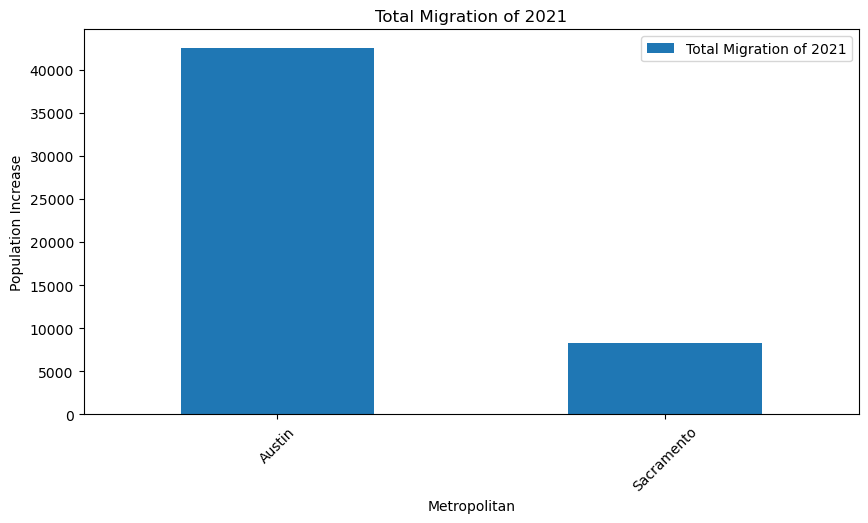

In [22]:
#Created a bar chart displaying poulation increase in 2021
bar = new_df.plot(kind="bar",figsize=(10,5))

bar.set_xticklabels(new_df["Metropolitan"], rotation=45 )

plt.title("Total Migration of 2021")
plt.xlabel("Metropolitan")
plt.ylabel("Population Increase")
plt.show()

In [23]:
new_df.to_excel("merger_final.xlsx")